# DL(w6) CNN
student ID: 7110018036\
name: Chieh-An, Chou

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

2023-03-29 17:31:24.423153: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### (check data)

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

[6]


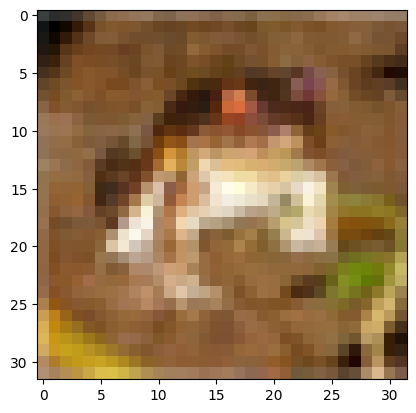

In [4]:
i = 0
print(y_train[i]) # 6: frog
plt.imshow(x_train[i])
plt.show()

### Preprocessing

In [5]:
# x value: 0-255 >> 0-1
x_train = x_train/255
x_test = x_test/255

## 1. Build Model

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten, Conv2D, MaxPooling2D, AveragePooling2D

keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

In [7]:
model = Sequential([
    # Conv-Pool1
    Conv2D(filters=30,              # number of filters
           kernel_size=(4,4),       # shape of filter_weight matrix
           strides=(1,1), padding='valid', # Default setting
           activation='relu', input_shape=(32,32,3)),
    Dropout(rate=.25),              # to avoid overefitting
    MaxPooling2D(pool_size=(2,2),   # w/o stride >> stride = pool_size
                 padding='valid'),
    # Conv-Pool2
    Conv2D(filters=60, kernel_size=3, strides=2, padding='same', activation='relu'),
    Dropout(rate=.25),
    AveragePooling2D(pool_size=2, padding='same'),
    # Fully Connected Layers
    Flatten(),
    Dropout(rate=.25),
    Dense(1024, activation='relu'),
    Dropout(rate=.25),
    Dense(10, activation='softmax')
])

2023-03-29 17:31:26.340210: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-29 17:31:26.362687: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-29 17:31:26.362782: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-29 17:31:26.363334: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

### (check model)

Output Shape: (mini_batch_size, H, W, C), C = chennels
+ Conv2D: [keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D), [pytorch](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
  + $H_{out} = \dfrac{H_{in}+2\times \text{padding}_H-1\times(K_H-1)-1}{\text{stride}_H}+1, W_{out} = \dfrac{W_{in}+2\times \text{padding}_W-1\times(K_W-1)-1}{\text{stride}_W}+1\text{, padding}\begin{cases}0 & \text{, if valid} \\ 1 & \text{, if same}\end{cases}$
  + $\text{Param} = (1+ K_H\times K_W\times C_{in})\times C_{out}$ , K = `kernel_size`
+ MaxPooling2D / AveragePooling2D
  +  `padding='valid'`: $H_{out} = floor( H_{in} / \text{pool}_H ), W_{out} = floor( W_{in} / \text{pool}_W )$
  +  `padding='same'`: $H_{out} = ceil( H_{in} / \text{pool}_H ), W_{out} = ceil( W_{in} / \text{pool}_W )$

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 30)        1470      
                                                                 
 dropout (Dropout)           (None, 29, 29, 30)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 60)          16260     
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 60)          0         
                                                                 
 average_pooling2d (AverageP  (None, 4, 4, 60)         0         
 ooling2D)                                              

## 2. Compile

In [9]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

## 3. Train 

In [10]:
train = model.fit(x_train, y_train, validation_split=.2,    # auto split for validation
                  epochs=10, batch_size=128, verbose=1)     # verbose: 0 -> no results, 1 -> full result, 2 -> only show epoch 

Epoch 1/10


2023-03-29 17:31:28.019286: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-03-29 17:31:28.700594: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8400
2023-03-29 17:31:29.520170: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-29 17:31:29.521461: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55e9ef762380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-29 17:31:29.521472: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-03-29 17:31:29.525187: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_uti

313/313 [==============================] - 4s 5ms/step - loss: 1.6849 - accuracy: 0.3868 - val_loss: 1.4629 - val_accuracy: 0.4962
Epoch 2/10
313/313 [==============================] - 2s 6ms/step - loss: 1.3838 - accuracy: 0.5023 - val_loss: 1.3085 - val_accuracy: 0.5549
Epoch 3/10
313/313 [==============================] - 2s 7ms/step - loss: 1.2672 - accuracy: 0.5462 - val_loss: 1.2289 - val_accuracy: 0.5808
Epoch 4/10
313/313 [==============================] - 2s 7ms/step - loss: 1.1753 - accuracy: 0.5853 - val_loss: 1.1320 - val_accuracy: 0.6076
Epoch 5/10
313/313 [==============================] - 2s 6ms/step - loss: 1.1053 - accuracy: 0.6087 - val_loss: 1.0561 - val_accuracy: 0.6417
Epoch 6/10
313/313 [==============================] - 3s 10ms/step - loss: 1.0554 - accuracy: 0.6252 - val_loss: 1.0442 - val_accuracy: 0.6398
Epoch 7/10
313/313 [==============================] - 2s 8ms/step - loss: 1.0062 - accuracy: 0.6435 - val_loss: 1.0436 - val_accuracy: 0.6389
Epoch 8/10
313/3

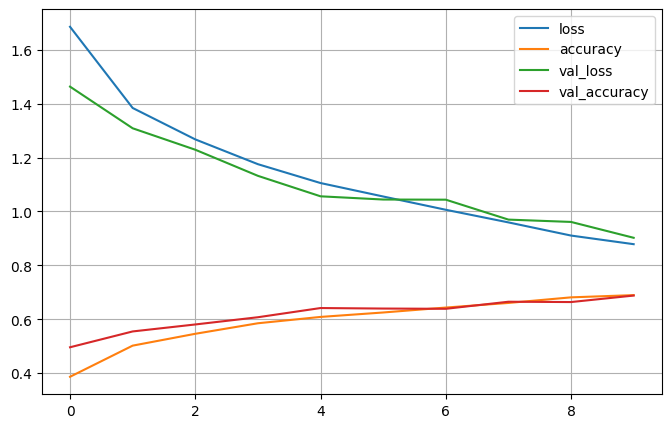

In [11]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

## 4. Evaluate

In [12]:
model.evaluate(x_test, y_test, verbose=0)

[0.8963953852653503, 0.6888999938964844]

## 5. Predict

In [13]:
y_prob = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_prob,axis=1)
print("y_prob = ", y_prob[:3].round(2), sep="\n")
print("y_pred = ", y_pred[:3])
print("y_true = ", y_test[:3].T)

y_prob = 
[[0.01 0.01 0.1  0.57 0.04 0.19 0.04 0.01 0.03 0.01]
 [0.01 0.27 0.   0.   0.   0.   0.   0.   0.71 0.  ]
 [0.14 0.13 0.   0.   0.   0.   0.   0.   0.66 0.06]]
y_pred =  [3 8 8]
y_true =  [[3 8 8]]


### (Confussion Matrix)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[744,  23,  68,  15,  23,   2,  14,   5,  74,  32],
       [ 18, 869,   6,   7,   3,   3,  12,   1,  24,  57],
       [ 70,   5, 608,  56,  94,  28,  98,  15,  13,  13],
       [ 20,  22, 121, 458,  86, 110, 130,  20,  16,  17],
       [ 21,   4, 125,  39, 635,   9, 126,  30,  11,   0],
       [ 13,   5, 123, 198,  80, 469,  65,  27,  17,   3],
       [  3,   6,  48,  25,  20,   5, 883,   1,   7,   2],
       [ 15,   8,  67,  45, 107,  40,  18, 681,   4,  15],
       [ 67,  56,  18,  11,   9,   2,   5,   1, 807,  24],
       [ 36, 135,  12,  13,  10,   4,  17,   9,  29, 735]])